#**2. Classification**

## Install packages

In [ ]:
!pip3 install scikit-learn pandas
!pip install xgboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.0 MB/s eta 0:00:00


##Explore data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
austin_housing = pd.read_csv('https://raw.githubusercontent.com/LinUTexas/ML_Fall23/main/austinHousingData_ML.csv')

In [ ]:
print (f'Number of data points: {len(austin_housing)}')
austin_housing.head()


Number of data points: 15171


streetAddress  zipcode  \
0   14424 Lake Victor Dr    78660   
1     1104 Strickling Dr    78660   
2    1408 Fort Dessau Rd    78660   
3     1025 Strickling Dr    78660   
4  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432672 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  ...  \
0             1.98             2               1           1          1  ...   
1             1.98             2               1           1          1  ...   
2             1.98             0               1           1          0  ...   
3             1.98             2               1           1          1  ...   
4             1.98             0               1           1          0  ...   

   yearBuilt   Price  latest_saledate  SizeSqFt  livingAreaSqFt  \
0       2012  305000       2019-09-02      6011            2601   
1       2013  295000       2020-10-13      6185            1768   
2       2018  256125       2019-07-31      7840            1478   
3       2013  240000       2018-08-08      6098            1678   
4       2002  239900       2018-10-31      6708            2132   

  avgSchoolDistance  avgSchoolRating  numOfBathrooms  numOfBedrooms  \
0             1.267            2.667             3.0              4   
1             1.400            2.667             2.0              4   
2             1.200            3.000             2.0              3   
3             1.400            2.667             2.0              3   
4             1.133            4.000             3.0              3   

   numOfStories  
0             2  
1             1  
2             1  
3             1  
4             2  

[5 rows x 23 columns]

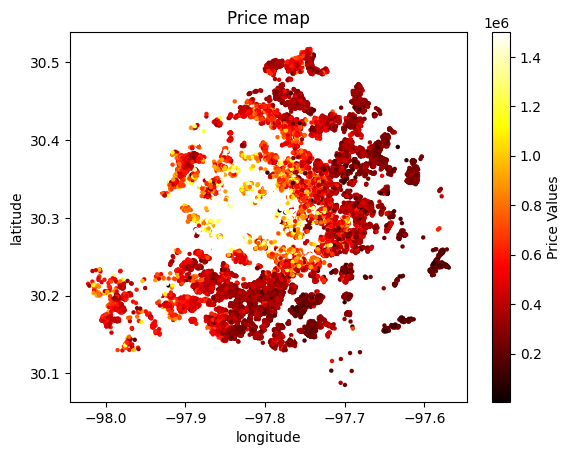

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(austin_housing['longitude'], austin_housing['latitude'], c=austin_housing['Price'], cmap='hot', marker='o', s=10 , edgecolors='none', vmax=1500000)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

##Filtering for features

Remove any feature in the dataset that we don't want to include in the training process.

In [ ]:
austin_housing = austin_housing.drop(['streetAddress', 'description',"latest_saledate"], axis =1)
austin_housing.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
0    78660  30.430632 -97.663078             1.98             2   
1    78660  30.432672 -97.661697             1.98             2   
2    78660  30.409748 -97.639771             1.98             0   
3    78660  30.432112 -97.661659             1.98             2   
4    78660  30.437368 -97.656860             1.98             0   

   hasAssociation  hasCooling  hasGarage  hasHeating  homeType  parkingSpaces  \
0               1           1          1           1         1              2   
1               1           1          1           1         1              2   
2               1           1          0           1         1              0   
3               1           1          1           1         1              2   
4               1           1          0           1         1              0   

   yearBuilt   Price  SizeSqFt  livingAreaSqFt  avgSchoolDistance  \
0       2012  305000      6011            2601              1.267   
1       2013  295000      6185            1768              1.400   
2       2018  256125      7840            1478              1.200   
3       2013  240000      6098            1678              1.400   
4       2002  239900      6708            2132              1.133   

   avgSchoolRating  numOfBathrooms  numOfBedrooms  numOfStories  
0            2.667             3.0              4             2  
1            2.667             2.0              4             1  
2            3.000             2.0              3             1  
3            2.667             2.0              3             1  
4            4.000             3.0              3             2

In [ ]:
X = austin_housing.copy(deep=True)
y = austin_housing['Price']
y.head()

0    305000
1    295000
2    256125
3    240000
4    239900
Name: Price, dtype: int64

##Training, testing and validation sets

In [ ]:
X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.2, random_state=42)

X_train = X_train_target.drop(['Price'], axis=1)
X_test = X_test_target.drop(['Price'], axis=1)
X_val = X_val_target.drop(['Price'], axis=1)

X_test_target.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
4826     78736  30.246622 -97.896843             1.98             2   
487      78733  30.317581 -97.841606             1.98             0   
6561     78749  30.207579 -97.841019             1.98             2   
2614     78733  30.348181 -97.859131             1.98             2   
11337    78752  30.326197 -97.681709             1.98             2   

       hasAssociation  hasCooling  hasGarage  hasHeating  homeType  \
4826                1           1          1           1         1   
487                 1           1          0           1         1   
6561                0           1          1           1         1   
2614                1           1          1           1         1   
11337               1           1          1           1         5   

       parkingSpaces  yearBuilt    Price  SizeSqFt  livingAreaSqFt  \
4826               2       2006   549900     15246            2820   
487                0       1996  1290000     73181            3652   
6561               2       1981   335240      8395            1392   
2614               2       1984   375000     15682            2058   
11337              2       1977   112000      5706            1822   

       avgSchoolDistance  avgSchoolRating  numOfBathrooms  numOfBedrooms  \
4826               3.433            6.667             3.0              4   
487                2.833            9.333             4.0              4   
6561               1.167            4.667             2.0              3   
2614               4.400            8.000             2.0              4   
11337              0.900            2.667             3.0              3   

       numOfStories  
4826              2  
487               2  
6561              1  
2614              1  
11337             2

In [ ]:
X_test.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
4826     78736  30.246622 -97.896843             1.98             2   
487      78733  30.317581 -97.841606             1.98             0   
6561     78749  30.207579 -97.841019             1.98             2   
2614     78733  30.348181 -97.859131             1.98             2   
11337    78752  30.326197 -97.681709             1.98             2   

       hasAssociation  hasCooling  hasGarage  hasHeating  homeType  \
4826                1           1          1           1         1   
487                 1           1          0           1         1   
6561                0           1          1           1         1   
2614                1           1          1           1         1   
11337               1           1          1           1         5   

       parkingSpaces  yearBuilt  SizeSqFt  livingAreaSqFt  avgSchoolDistance  \
4826               2       2006     15246            2820              3.433   
487                0       1996     73181            3652              2.833   
6561               2       1981      8395            1392              1.167   
2614               2       1984     15682            2058              4.400   
11337              2       1977      5706            1822              0.900   

       avgSchoolRating  numOfBathrooms  numOfBedrooms  numOfStories  
4826             6.667             3.0              4             2  
487              9.333             4.0              4             2  
6561             4.667             2.0              3             1  
2614             8.000             2.0              4             1  
11337            2.667             3.0              3             2

##Without Grouping

###DecisionTreeClassifier

We attampted to predict the house price in Austin with the simplest method, decision tree.

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
clf_1 = tree.DecisionTreeClassifier(max_depth=19)
clf_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [ ]:
austin_housing_pricemap1 = X_test[['latitude','longitude']]
austin_housing_pricemap1['prediction']= clf_1.predict(X_test)
austin_housing_pricemap1.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


latitude  longitude  prediction
4826   30.246622 -97.896843      569000
487    30.317581 -97.841606      949500
6561   30.207579 -97.841019      350000
2614   30.348181 -97.859131      389000
11337  30.326197 -97.681709      240000

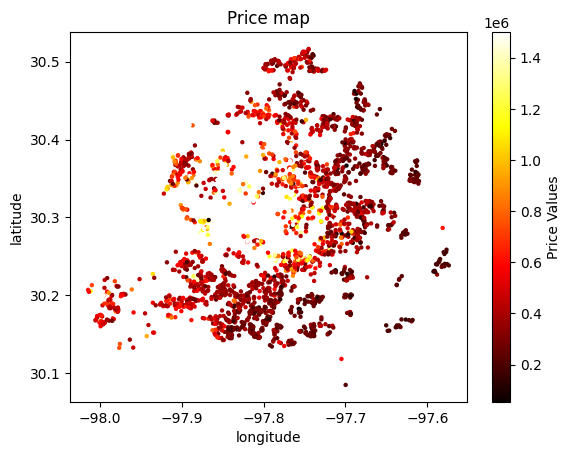

In [ ]:
# Plotting the scatter plot
plt.scatter(austin_housing_pricemap1['longitude'], austin_housing_pricemap1['latitude'], c=austin_housing_pricemap1['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmax=1500000)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

####**Error in the predictions:**

Average error: 7.338850388181028 %


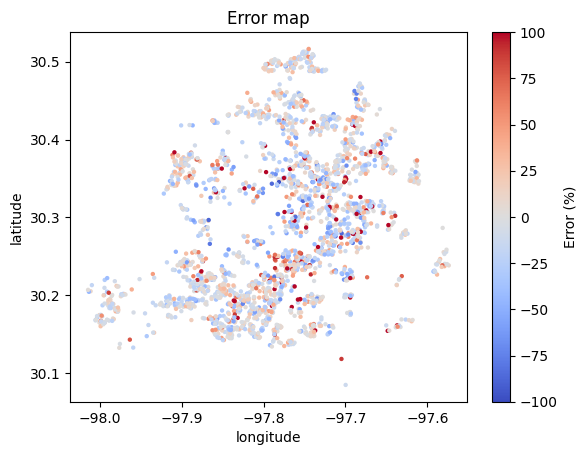

In [ ]:
import pandas as pd

dif= pd.DataFrame()
dif['longitude']= X_test['longitude']
dif['latitude']= X_test['latitude']
dif['difference']= 100*(clf_1.predict(X_test) - X_test_target['Price'])/X_test_target['Price']

print(f"Average error: {dif['difference'].mean()} %")

# Plotting the scatter plot
plt.scatter(dif['longitude'], dif['latitude'], c=dif['difference'], cmap='coolwarm', marker='o', s=10 , edgecolors='none', vmin=-100 , vmax=100)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Error (%)')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Error map')

# Display the plot
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


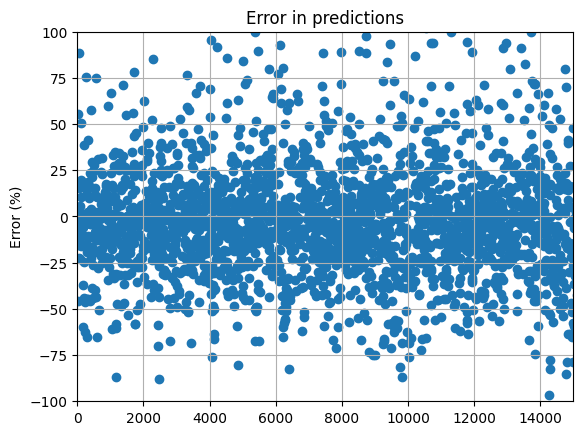

In [ ]:
# Plotting the error as a scatter plot
plt.scatter(X_test.index, y=dif['difference'], vmin= -100, vmax=100)

import pandas as pd
import matplotlib.pyplot as plt

plt.xlim(0, 15000)
plt.ylim(-100, 100)

# Labeling and title
plt.ylabel('Error (%)')
plt.title('Error in predictions')

# Show plot
plt.grid(True)
plt.show()


##Grouping

During the process, we found that even though it is possible to implement with decision tree, the data is too large for other classification methods.

To implement the classification with more complicated methods such as, Random forest, we had to devide the data into specific ranges. On the other hand, the computing time was very big. Additionally, to have values as for example the scores of the predictions and confusion matriz we needed to have specific renages.

###Grouping Process

In [ ]:
df= austin_housing

In [ ]:
for i in range (0, len(df['Price'])):
  if df['Price'][i] <= 250000:
    df['Price'][i]=0
  elif df['Price'][i] <= 500000:
    df['Price'][i]=1
  elif df['Price'][i] <= 750000:
    df['Price'][i]=2
  elif df['Price'][i]<=1000000:
    df['Price'][i]=3
  elif df['Price'][i]<= 1250000:
    df['Price'][i]=4
  elif df['Price'][i]<= 1500000:
    df['Price'][i]=5
  elif df['Price'][i] > 1500000:
    df['Price'][i]=6

df['Price'].head()

<ipython-input-14-f8133aaeb58e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i]=1
<ipython-input-14-f8133aaeb58e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i]=0
<ipython-input-14-f8133aaeb58e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i]=2
<ipython-input-14-f8133aaeb58e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

0    1
1    1
2    1
3    0
4    0
Name: Price, dtype: int64

In [ ]:
df['Price'].max()

6

In [ ]:
X = df.copy(deep=True)
y = df['Price']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Price, dtype: int64

###Training, testing and validation sets After Grouping



In [ ]:
X.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
0    78660  30.430632 -97.663078             1.98             2   
1    78660  30.432672 -97.661697             1.98             2   
2    78660  30.409748 -97.639771             1.98             0   
3    78660  30.432112 -97.661659             1.98             2   
4    78660  30.437368 -97.656860             1.98             0   

   hasAssociation  hasCooling  hasGarage  hasHeating  homeType  parkingSpaces  \
0               1           1          1           1         1              2   
1               1           1          1           1         1              2   
2               1           1          0           1         1              0   
3               1           1          1           1         1              2   
4               1           1          0           1         1              0   

   yearBuilt  Price  SizeSqFt  livingAreaSqFt  avgSchoolDistance  \
0       2012      1      6011            2601              1.267   
1       2013      1      6185            1768              1.400   
2       2018      1      7840            1478              1.200   
3       2013      0      6098            1678              1.400   
4       2002      0      6708            2132              1.133   

   avgSchoolRating  numOfBathrooms  numOfBedrooms  numOfStories  
0            2.667             3.0              4             2  
1            2.667             2.0              4             1  
2            3.000             2.0              3             1  
3            2.667             2.0              3             1  
4            4.000             3.0              3             2

In [ ]:
y_test.values

array([ 549900, 1290000,  335240, ...,  315000,  342000,  299900])

We are going to use the `train_test_split` function twice to split the data into training + validation and testing. Then, we split the `training + validation` into training and validation. We retrain the target values for now, so we can check how good is our prediction.

In [ ]:
X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train_target.drop(['Price'], axis=1)
X_test = X_test_target.drop(['Price'], axis=1)
X_val = X_val_target.drop(['Price'], axis=1)

In [ ]:
X_test_target.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
4826     78736  30.246622 -97.896843             1.98             2   
487      78733  30.317581 -97.841606             1.98             0   
6561     78749  30.207579 -97.841019             1.98             2   
2614     78733  30.348181 -97.859131             1.98             2   
11337    78752  30.326197 -97.681709             1.98             2   

       hasAssociation  hasCooling  hasGarage  hasHeating  homeType  \
4826                1           1          1           1         1   
487                 1           1          0           1         1   
6561                0           1          1           1         1   
2614                1           1          1           1         1   
11337               1           1          1           1         5   

       parkingSpaces  yearBuilt  Price  SizeSqFt  livingAreaSqFt  \
4826               2       2006      2     15246            2820   
487                0       1996      5     73181            3652   
6561               2       1981      1      8395            1392   
2614               2       1984      1     15682            2058   
11337              2       1977      0      5706            1822   

       avgSchoolDistance  avgSchoolRating  numOfBathrooms  numOfBedrooms  \
4826               3.433            6.667             3.0              4   
487                2.833            9.333             4.0              4   
6561               1.167            4.667             2.0              3   
2614               4.400            8.000             2.0              4   
11337              0.900            2.667             3.0              3   

       numOfStories  
4826              2  
487               2  
6561              1  
2614              1  
11337             2

In [ ]:
X_test.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
4826     78736  30.246622 -97.896843             1.98             2   
487      78733  30.317581 -97.841606             1.98             0   
6561     78749  30.207579 -97.841019             1.98             2   
2614     78733  30.348181 -97.859131             1.98             2   
11337    78752  30.326197 -97.681709             1.98             2   

       hasAssociation  hasCooling  hasGarage  hasHeating  homeType  \
4826                1           1          1           1         1   
487                 1           1          0           1         1   
6561                0           1          1           1         1   
2614                1           1          1           1         1   
11337               1           1          1           1         5   

       parkingSpaces  yearBuilt  SizeSqFt  livingAreaSqFt  avgSchoolDistance  \
4826               2       2006     15246            2820              3.433   
487                0       1996     73181            3652              2.833   
6561               2       1981      8395            1392              1.167   
2614               2       1984     15682            2058              4.400   
11337              2       1977      5706            1822              0.900   

       avgSchoolRating  numOfBathrooms  numOfBedrooms  numOfStories  
4826             6.667             3.0              4             2  
487              9.333             4.0              4             2  
6561             4.667             2.0              3             1  
2614             8.000             2.0              4             1  
11337            2.667             3.0              3             2

In [ ]:
y_test.values

array([2, 5, 1, ..., 1, 1, 1])

In [ ]:
from pandas.core.frame import DataFrame
df2= df[['longitude', 'latitude','Price']]

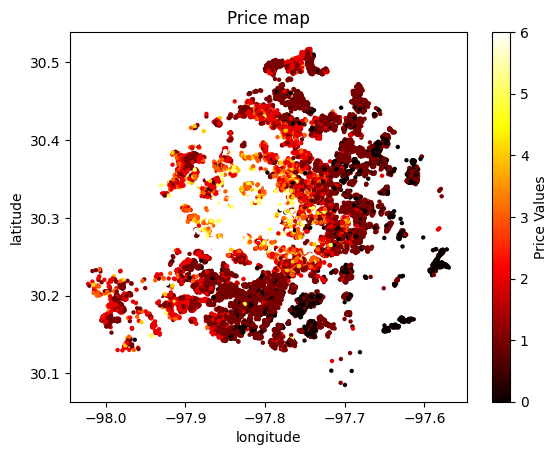

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df2['longitude'], df2['latitude'], c=df2['Price'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()


###1.1 DecisionTreeClassifier

Scikit-learn, often referred to as sklearn, is one of the most popular libraries for machine learning in Python

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score, roc_curve, roc_auc_score, accuracy_score, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

####RandomSearch

In [ ]:
# Different param2
def rfr_model(X, y):
# Perform Randomized-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=0),
        param_distributions={
            'max_depth': range(10,20),
            'min_samples_split': (2, 5, 10, 17),
            'min_samples_leaf': (1, 2, 4, 7, 9),

        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = DecisionTreeClassifier(max_depth=best_params["max_depth"],
                                 min_samples_split=best_params["min_samples_split"],
                                 min_samples_leaf=best_params["min_samples_leaf"])
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_decision_tree = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_decision_tree

In [ ]:
# run optimization algorithm and print CV scores
scores, odt = rfr_model(X_train,y_train)

Scores: {} [0.69028007 0.69192751 0.684514   0.68698517 0.68121911 0.68698517
 0.69249794 0.69661995 0.71970322 0.70733718]


In [ ]:
#print GridSearch results
print('Best parameters:', odt)
print('---')
print('CV scores:', scores)
print('CV scores (average):', np.mean(scores))
print('Training score:', odt.score(X_train, y_train))
print('Testing score:', odt.score(X_test, y_test))

Best parameters: DecisionTreeClassifier(max_depth=13, min_samples_leaf=7, min_samples_split=10,
                       random_state=0)
---
CV scores: [0.69028007 0.69192751 0.684514   0.68698517 0.68121911 0.68698517
 0.69249794 0.69661995 0.71970322 0.70733718]
CV scores (average): 0.6938069323134467
Training score: 0.8011700725115359
Testing score: 0.7038714991762768


####GridSearch

In [ ]:
#define function to find best parameter combination based on Cohen’s kappa coefficient
def rfr_model(X, y):
# Perform Grid-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={
            'max_depth': range(10,20),
            'min_samples_split': (2, 5, 10, 17),
            'min_samples_leaf': (1, 2, 4, 7, 9),
        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = DecisionTreeClassifier(max_depth=best_params["max_depth"],
                                 min_samples_split=best_params["min_samples_split"],
                                 min_samples_leaf=best_params["min_samples_leaf"])
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_decision_tree = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_decision_tree

In [ ]:
# run optimization algorithm and print CV scores
scores, odt = rfr_model(X_train,y_train)

Scores: {} [0.70345964 0.69934102 0.69192751 0.69028007 0.69439868 0.68863262
 0.71063479 0.70651278 0.71970322 0.70568838]


In [ ]:
#print GridSearch results
print('Best parameters:', odt)
print('---')
print('CV scores:', scores)
print('CV scores (average):', np.mean(scores))
print('Training score:', odt.score(X_train, y_train))
print('Testing score:', odt.score(X_test, y_test))

Best parameters: DecisionTreeClassifier(max_depth=12, min_samples_leaf=9)
---
CV scores: [0.70345964 0.69934102 0.69192751 0.69028007 0.69439868 0.68863262
 0.71063479 0.70651278 0.71970322 0.70568838]
CV scores (average): 0.7010578697824638
Training score: 0.7814765985497693
Testing score: 0.7096375617792422


####Different Max Depth

#####Max Depth=19

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=19)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [ ]:
clf.predict(X_test)

array([2, 6, 0, ..., 1, 2, 0])

In [ ]:
X_test.head()


zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
4826     78736  30.246622 -97.896843             1.98             2   
487      78733  30.317581 -97.841606             1.98             0   
6561     78749  30.207579 -97.841019             1.98             2   
2614     78733  30.348181 -97.859131             1.98             2   
11337    78752  30.326197 -97.681709             1.98             2   

       hasAssociation  hasCooling  hasGarage  hasHeating  homeType  \
4826                1           1          1           1         1   
487                 1           1          0           1         1   
6561                0           1          1           1         1   
2614                1           1          1           1         1   
11337               1           1          1           1         5   

       parkingSpaces  yearBuilt  SizeSqFt  livingAreaSqFt  avgSchoolDistance  \
4826               2       2006     15246            2820              3.433   
487                0       1996     73181            3652              2.833   
6561               2       1981      8395            1392              1.167   
2614               2       1984     15682            2058              4.400   
11337              2       1977      5706            1822              0.900   

       avgSchoolRating  numOfBathrooms  numOfBedrooms  numOfStories  
4826             6.667             3.0              4             2  
487              9.333             4.0              4             2  
6561             4.667             2.0              3             1  
2614             8.000             2.0              4             1  
11337            2.667             3.0              3             2

In [ ]:
df3 = X_test[['latitude','longitude']]
df3.head()

latitude  longitude
4826   30.246622 -97.896843
487    30.317581 -97.841606
6561   30.207579 -97.841019
2614   30.348181 -97.859131
11337  30.326197 -97.681709

In [ ]:
df3['prediction']= clf.predict(X_test)

<ipython-input-35-ca01dccdd8fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


In [ ]:
X_test['latitude'].head()

4826     30.246622
487      30.317581
6561     30.207579
2614     30.348181
11337    30.326197
Name: latitude, dtype: float64

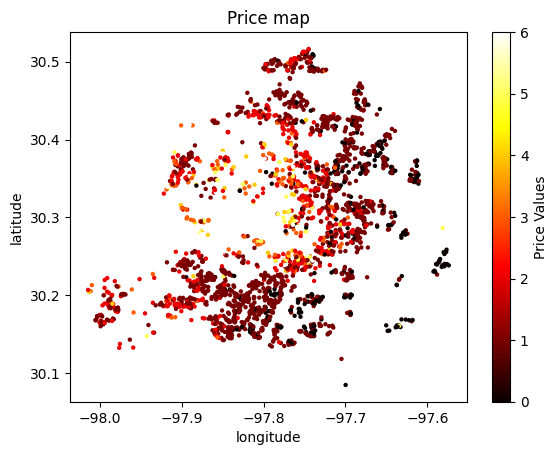

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

In [ ]:
print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

Training score: 96.86%
Validation score: 66.23%
Testing score: 68.20%


In [ ]:
accuracy_score(y_test, clf.predict(X_test))

0.6820428336079077

#####Max Depth=17

<ipython-input-40-4f9f4036476d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


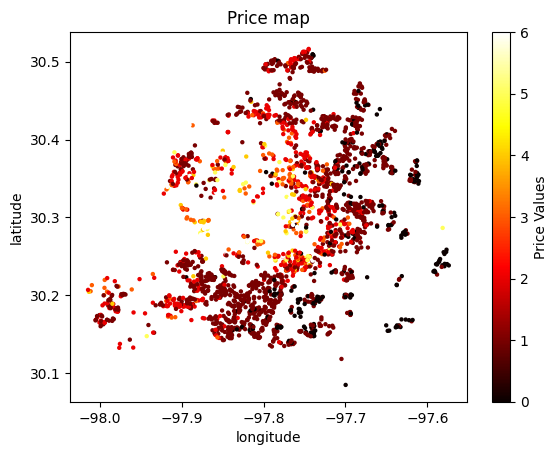

Training score: 94.61%
Validation score: 67.55%
Testing score: 69.77%


0.6976935749588138

In [ ]:
### When max_depth = 17

clf = tree.DecisionTreeClassifier(max_depth=17)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=18

<ipython-input-41-9a76f32a27db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


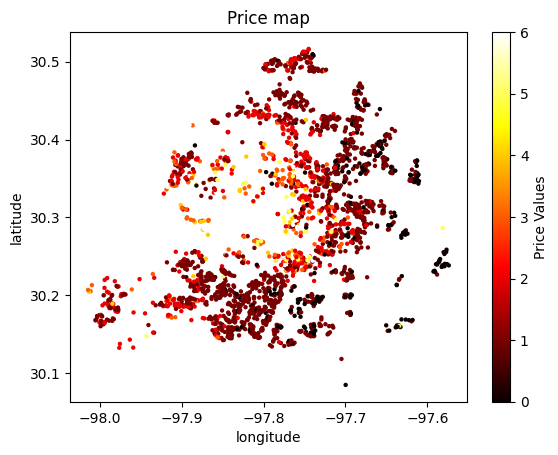

Training score: 95.74%
Validation score: 66.39%
Testing score: 69.60%


0.6960461285008237

In [ ]:
### When max_depth = 18

clf = tree.DecisionTreeClassifier(max_depth=18)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=20

<ipython-input-43-97f9b3161f38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


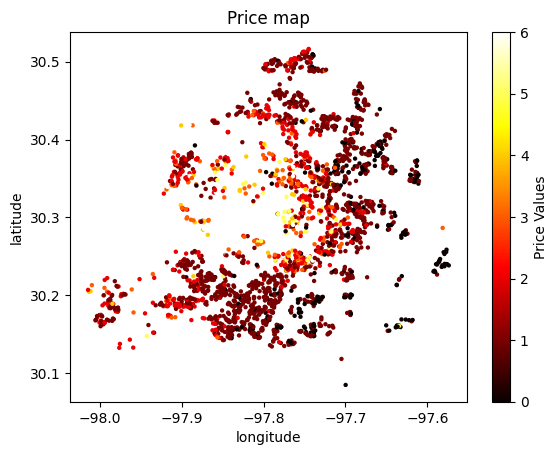

Training score: 97.72%
Validation score: 64.91%
Testing score: 67.87%


0.6787479406919276

In [ ]:
### When max_depth = 20

clf = tree.DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=21

<ipython-input-44-1cbcc962aebb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


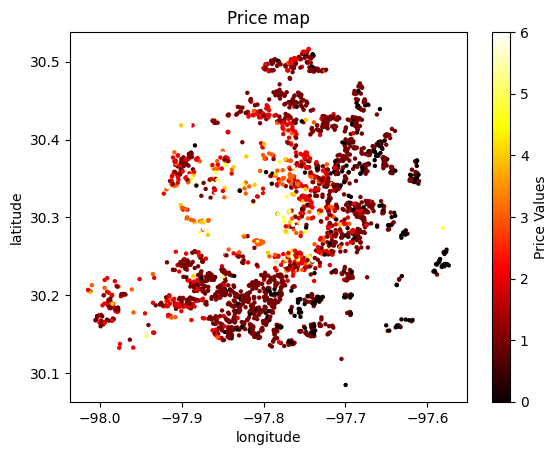

Training score: 98.38%
Validation score: 66.56%
Testing score: 67.38%


0.6738056013179572

In [ ]:
### When max_depth = 21

clf = tree.DecisionTreeClassifier(max_depth=21)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=9

<ipython-input-45-8d0103b76871>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


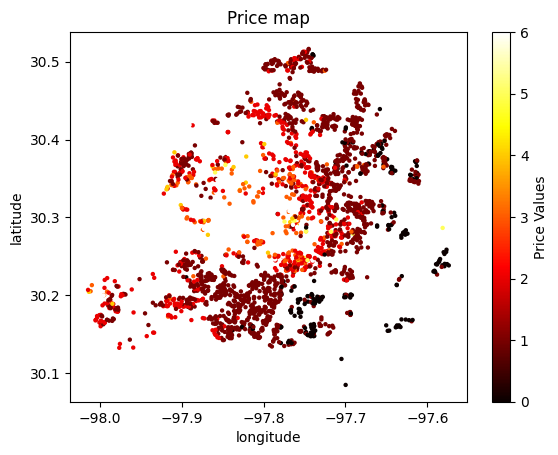

Training score: 75.42%
Validation score: 66.72%
Testing score: 70.14%


0.7014003294892917

In [ ]:
### When max_depth = 9

clf = tree.DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=13

<ipython-input-46-969fd7a32234>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


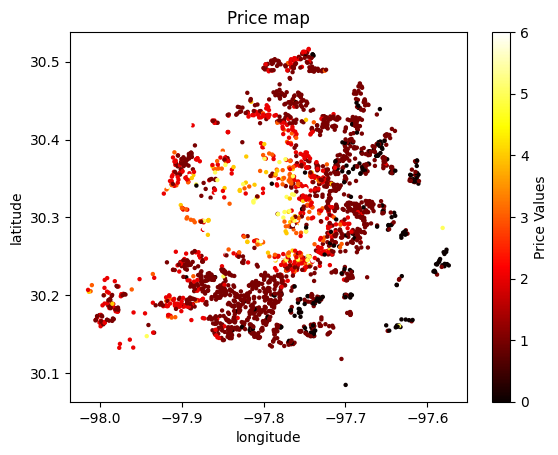

Training score: 86.89%
Validation score: 69.52%
Testing score: 70.55%


0.7055189456342669

In [ ]:
### When max_depth = 13

clf = tree.DecisionTreeClassifier(max_depth=13)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=15

<ipython-input-47-16778da1c0f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


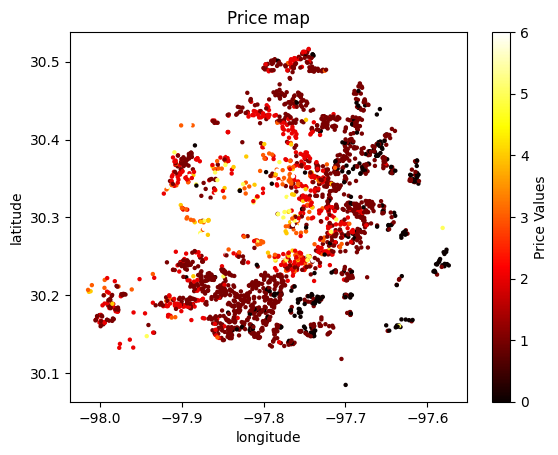

Training score: 91.49%
Validation score: 68.37%
Testing score: 69.15%


0.6915156507413509

In [ ]:
### When max_depth = 15

clf = tree.DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=12

<ipython-input-48-e107eeb6dd85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


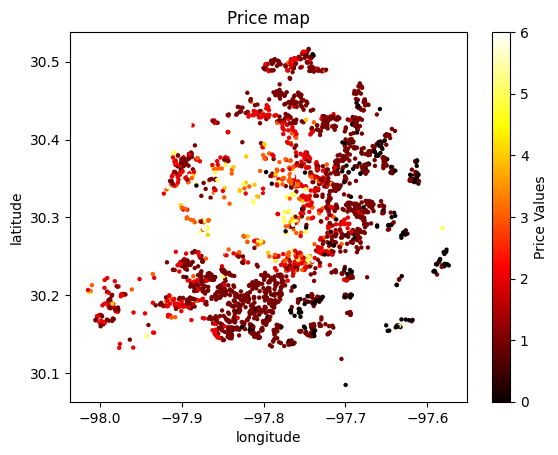

Training score: 84.16%
Validation score: 70.02%
Testing score: 70.96%


0.7096375617792422

In [ ]:
### When max_depth = 12

clf = tree.DecisionTreeClassifier(max_depth=12)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth=8

<ipython-input-49-4cab06f4fc59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


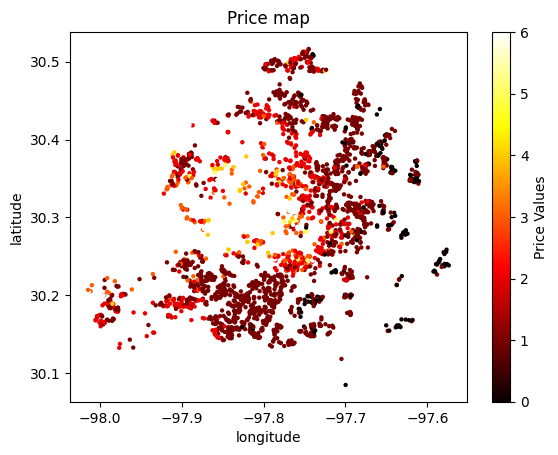

Training score: 73.19%
Validation score: 67.38%
Testing score: 68.86%


0.6886326194398682

In [ ]:
### When max_depth = 8

clf = tree.DecisionTreeClassifier(max_depth=8)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

####Model Performance vs Max Depth Graph

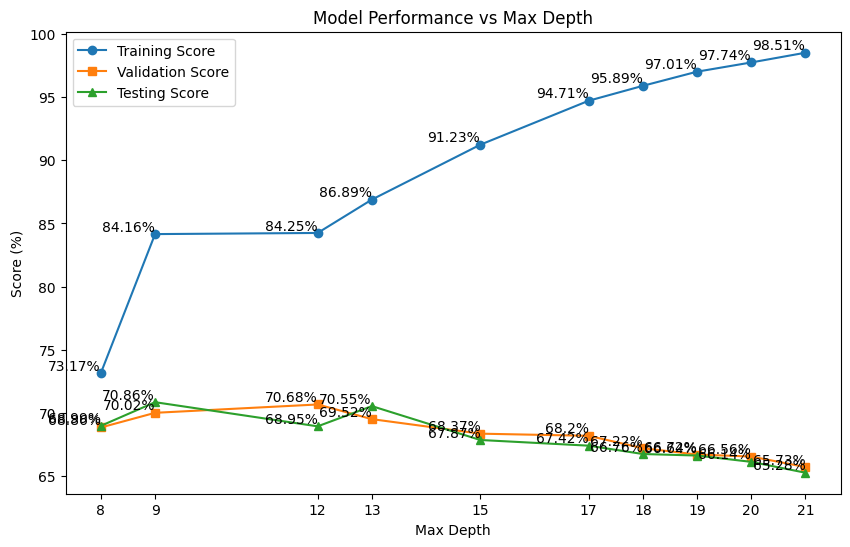

In [ ]:
import matplotlib.pyplot as plt

# Max_depth values
max_depths = [8, 9, 12, 13, 15, 17, 18, 19, 20, 21]

# Training, validation, and testing scores
training_scores = [73.17, 84.16, 84.25, 86.89, 91.23, 94.71, 95.89, 97.01, 97.74, 98.51]
validation_scores = [68.86, 70.02, 70.68, 69.52, 68.37, 68.20, 67.22, 66.72, 66.56, 65.73]
testing_scores = [68.99, 70.86, 68.95, 70.55, 67.87, 67.42, 66.76, 66.64, 66.14, 65.28]

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_scores, marker='o', label='Training Score')
plt.plot(max_depths, validation_scores, marker='s', label='Validation Score')
plt.plot(max_depths, testing_scores, marker='^', label='Testing Score')

for i in range(len(max_depths)):
    plt.text(max_depths[i], training_scores[i], f'{training_scores[i]}%', ha='right', va='bottom')
    plt.text(max_depths[i], validation_scores[i], f'{validation_scores[i]}%', ha='right', va='bottom')
    plt.text(max_depths[i], testing_scores[i], f'{testing_scores[i]}%', ha='right', va='bottom')

# Adding title and labels
plt.title('Model Performance vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score (%)')
plt.xticks(max_depths)

# Adding legend
plt.legend()

# Show plot
plt.show()

####Confusion Matrix

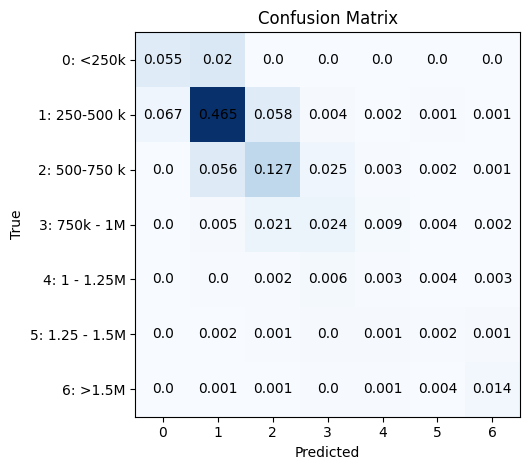

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, normalize=False):

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / len(y_true)
        cm = np.round(cm, decimals=3)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=plt.cm.Blues)

    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_yticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(['0','1', '2', '3', '4', '5','6'])
    #ax.set_yticklabels(['0','1', '2', '3', '4', '5','6'])
    #ax.set_xticklabels(['0: <250k','1: 250-500 k', '2: 500-750 k', '3: 750k - 1M','4: 1 - 1.25M', '5: 1.25 - 1.5M', '6: >1.5M'])
    ax.set_yticklabels(['0: <250k','1: 250-500 k', '2: 500-750 k', '3: 750k - 1M','4: 1 - 1.25M', '5: 1.25 - 1.5M', '6: >1.5M'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    for i in range(7):
        for j in range(7):
            text = ax.text(j, i, cm[j, i], ha="center", va="center", color="black")

    ax.set_title('Confusion Matrix')
    fig.tight_layout()
    plt.show()

# make prediction on test set
y_pred = clf.predict(X_test)
# plot confusion matrix for test set
plot_confusion_matrix(y_test, y_pred, normalize=True)

In this case, we aim to abtain higher values in the diagonal or near the diagonal.

In [ ]:
## Compute feature importance for random forest
def plot_feature_importance(X, model):
    df3=pd.get_dummies(X)
    features = df3.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]  # top 10 features
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

    fi = pd.DataFrame({'feature': list(X.columns),
                       'importance': model.feature_importances_}).\
                       sort_values('importance', ascending = False)

    return fi

####**Explainable AI**



#####**Permutation Importance**

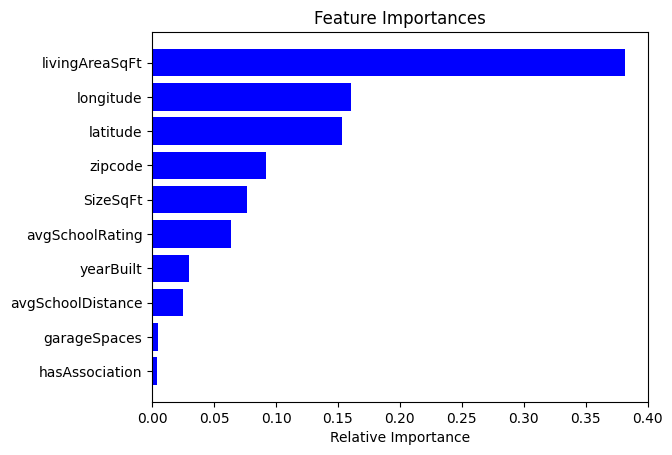

feature  importance
13     livingAreaSqFt    0.381467
2           longitude    0.160476
1            latitude    0.153532
0             zipcode    0.092218
12           SizeSqFt    0.076660
15    avgSchoolRating    0.063929
11          yearBuilt    0.029476
14  avgSchoolDistance    0.025099
4        garageSpaces    0.004440
5      hasAssociation    0.003765
16     numOfBathrooms    0.002865
10      parkingSpaces    0.002757
18       numOfStories    0.001625
17      numOfBedrooms    0.000638
6          hasCooling    0.000574
7           hasGarage    0.000479
8          hasHeating    0.000000
3     propertyTaxRate    0.000000
9            homeType    0.000000

In [ ]:
# Display results for decision tree
plot_feature_importance(X_test, clf)

#####**Shap**

This shaps values are just for illustrative porpuse. We will analyze especific results later, for each range predicted, and correct prediction and wrong prediction.

In [ ]:
X_test_target['Prediction'] = y_pred
X_test_target.head()

zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
4826     78736  30.246622 -97.896843             1.98             2   
487      78733  30.317581 -97.841606             1.98             0   
6561     78749  30.207579 -97.841019             1.98             2   
2614     78733  30.348181 -97.859131             1.98             2   
11337    78752  30.326197 -97.681709             1.98             2   

       hasAssociation  hasCooling  hasGarage  hasHeating  homeType  ...  \
4826                1           1          1           1         1  ...   
487                 1           1          0           1         1  ...   
6561                0           1          1           1         1  ...   
2614                1           1          1           1         1  ...   
11337               1           1          1           1         5  ...   

       yearBuilt  Price  SizeSqFt  livingAreaSqFt  avgSchoolDistance  \
4826        2006      2     15246            2820              3.433   
487         1996      5     73181            3652              2.833   
6561        1981      1      8395            1392              1.167   
2614        1984      1     15682            2058              4.400   
11337       1977      0      5706            1822              0.900   

       avgSchoolRating  numOfBathrooms  numOfBedrooms  numOfStories  \
4826             6.667             3.0              4             2   
487              9.333             4.0              4             2   
6561             4.667             2.0              3             1   
2614             8.000             2.0              4             1   
11337            2.667             3.0              3             2   

       Prediction  
4826            3  
487             3  
6561            1  
2614            2  
11337           1  

[5 rows x 21 columns]

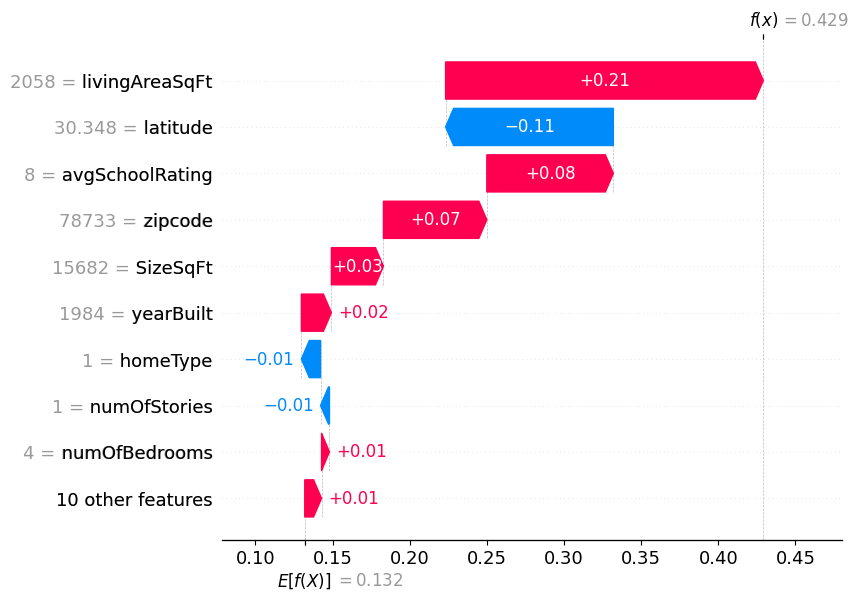

In [ ]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X_test)

sv= shap_values[3]

sv.values = sv.values[:,1]

sv.base_values= sv.base_values[0]

shap.plots.waterfall(sv)

71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


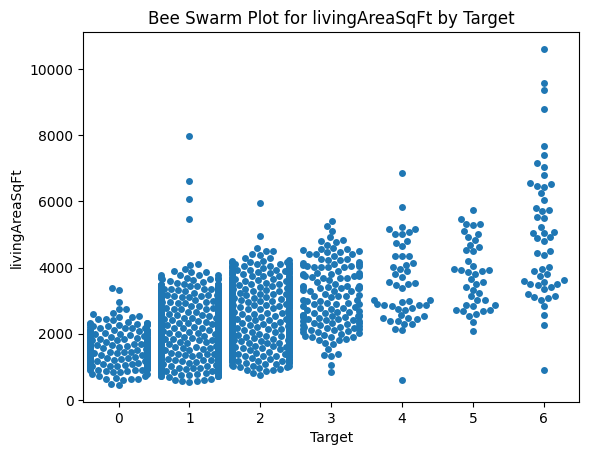

In [ ]:
import seaborn as sns

Living_area_sqft = 'livingAreaSqFt'
data_to_visualize = pd.DataFrame({'livingAreaSqFt': X_test[Living_area_sqft], 'Target': y_test})

# Create a bee swarm plot
sns.swarmplot(x="Target", y='livingAreaSqFt', data=data_to_visualize)

# Add labels and title plt.xlabel("Target")
plt.ylabel('livingAreaSqFt')
plt.title(f"Bee Swarm Plot for {Living_area_sqft} by Target")

# Show the plot
plt.show()

46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


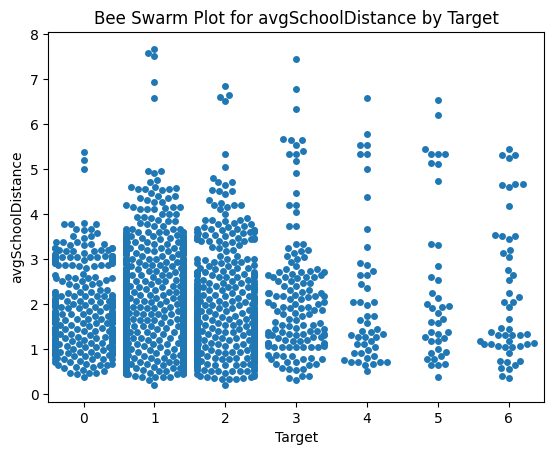

In [ ]:
import seaborn as sns

School_distance = 'avgSchoolDistance'
data_to_visualize = pd.DataFrame({'avgSchoolDistance': X_test[School_distance], 'Target': y_test})

# Create a bee swarm plot
sns.swarmplot(x="Target", y='avgSchoolDistance', data=data_to_visualize)

# Add labels and title plt.xlabel("Target")
plt.ylabel('avgSchoolDistance')
plt.title(f"Bee Swarm Plot for {School_distance} by Target")

# Show the plot
plt.show()

40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


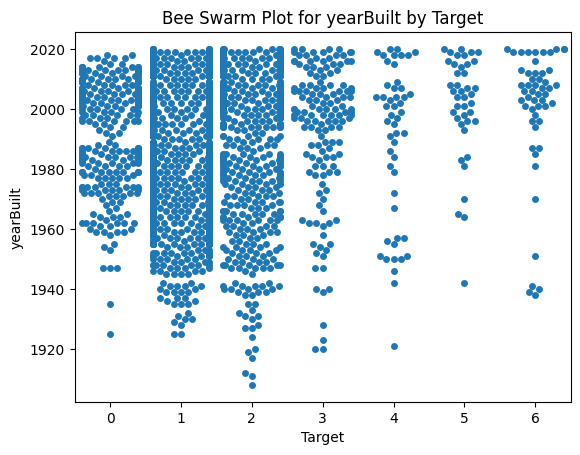

In [ ]:
year_built = 'yearBuilt'
data_to_visualize = pd.DataFrame({'yearBuilt': X_test[year_built], 'Target': y_test})

# Create a bee swarm plot
sns.swarmplot(x="Target", y='yearBuilt', data=data_to_visualize)

# Add labels and title plt.xlabel("Target")
plt.ylabel('yearBuilt')
plt.title(f"Bee Swarm Plot for {year_built} by Target")

# Show the plot
plt.show()

### 1.2. Random forest



Note: we still have to run this again (thith random search and grid search) and analyze the explaiability for random fores. The problem is that it takes a lot of time to run.

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score, roc_curve, roc_auc_score, accuracy_score, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

####Grid Search

In [ ]:
# Different param
def rfr_model(X, y):
# Perform Grid-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(10,20),
            'max_features': ('auto','sqrt','log2'),
            'n_estimators': (10, 50, 100, 1000),
            'criterion': ('gini','entropy'),
        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestClassifier(max_depth=best_params["max_depth"],
                                 n_estimators=best_params["n_estimators"],
                                 max_features=best_params["max_features"], criterion = best_params["criterion"])
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_random_forest = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_random_forest

In [ ]:
# run optimization algorithm and print CV scores
scores, orf = rfr_model(X_train,y_train)

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Scores: {} [0.7446458  0.73723229 0.74299835 0.73228995 0.73476112 0.74052718
 0.7485573  0.75680132 0.76009893 0.73289365]


In [ ]:
#print GridSearch results
print('Best parameters:', orf)
print('---')
print('CV scores:', scores)
print('CV scores (average):', np.mean(scores))
print('Training score:', orf.score(X_train, y_train))
print('Testing score:', orf.score(X_test, y_test))

Best parameters: RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=1000)
---
CV scores: [0.74382208 0.73476112 0.74711697 0.72899506 0.73228995 0.73805601
 0.74443528 0.75267931 0.75680132 0.74196208]
CV scores (average): 0.7420919174619818
Training score: 0.9649802241265656
Testing score: 0.7438220757825371


####Random Search

In [ ]:
# Different param2
def rfr_model(X, y):
# Perform Randomized-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=0),
        param_distributions={
            'max_depth': range(10,20),
            'max_features': ('auto','sqrt','log2'),
            'n_estimators': (10, 50, 100, 1000),
            'criterion': ('gini','entropy'),
        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestClassifier(max_depth=best_params["max_depth"],
                                 n_estimators=best_params["n_estimators"],
                                 max_features=best_params["max_features"], criterion = best_params["criterion"])
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_random_forest = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_random_forest

In [ ]:
# run optimization algorithm and print CV scores
scores, rf = rfr_model(X_train, y_train)

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Scores: {} [0.74382208 0.73476112 0.74711697 0.72899506 0.73228995 0.73805601
 0.74443528 0.75267931 0.75680132 0.74196208]


In [ ]:
#print RandomSearch results
print('Best parameters:', rf)
print('---')
print('CV scores:', scores)
print('CV scores (average):', np.mean(scores))
print('Training score:', rf.score(X_train, y_train))
print('Testing score:', rf.score(X_test, y_test))

Best parameters: RandomForestClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       n_estimators=1000, random_state=0)
---
CV scores: [0.74382208 0.73476112 0.74711697 0.72899506 0.73228995 0.73805601
 0.74443528 0.75267931 0.75680132 0.74196208]
CV scores (average): 0.7420919174619818
Training score: 0.9906064601186553
Testing score: 0.7405271828665568


####Different Max Depth

#####Max Depth = 17

<ipython-input-59-f635eead3c7a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


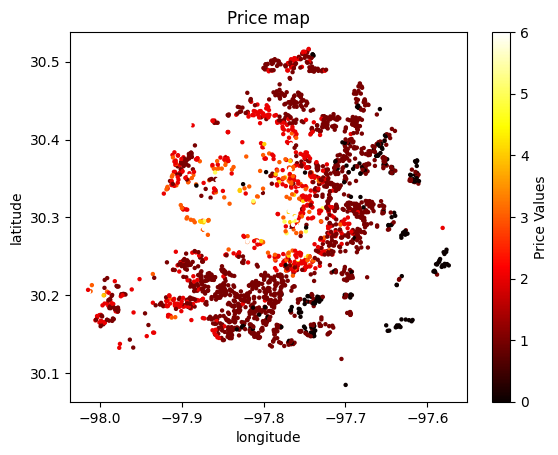

Training score: 97.31%
Validation score: 75.29%
Testing score: 74.63%


0.7462932454695222

In [ ]:
### When max_depth = 17

clf = RandomForestClassifier(max_depth=17)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 15

<ipython-input-60-2b5d949836b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


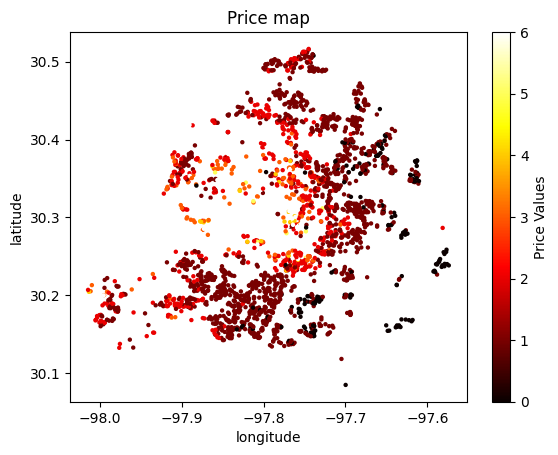

Training score: 94.97%
Validation score: 75.12%
Testing score: 74.55%


0.7454695222405272

In [ ]:
### When max_depth = 15

clf = RandomForestClassifier(max_depth=15)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 19

<ipython-input-61-ff88fe1eafb2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


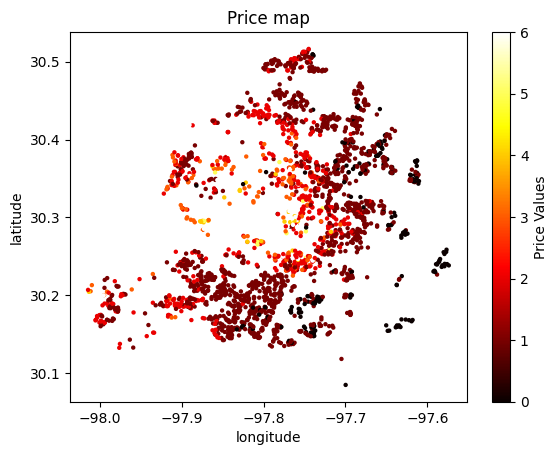

Training score: 98.83%
Validation score: 74.96%
Testing score: 74.63%


0.7462932454695222

In [ ]:
### When max_depth = 19

clf = RandomForestClassifier(max_depth=19)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 18

<ipython-input-62-b7ce5148127d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


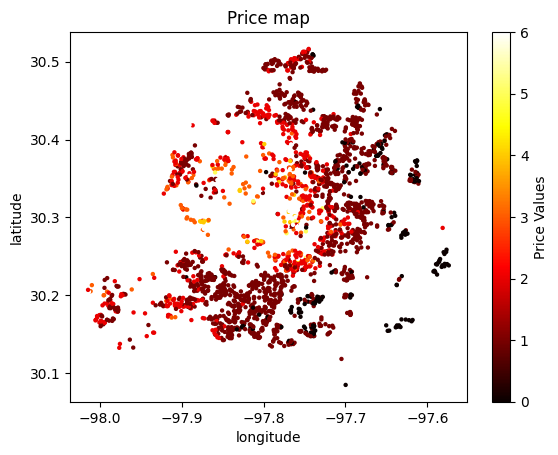

Training score: 98.19%
Validation score: 76.44%
Testing score: 74.14%


0.7413509060955519

In [ ]:
### When max_depth = 18

clf = RandomForestClassifier(max_depth=18)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 20

<ipython-input-63-2a71e51a1214>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


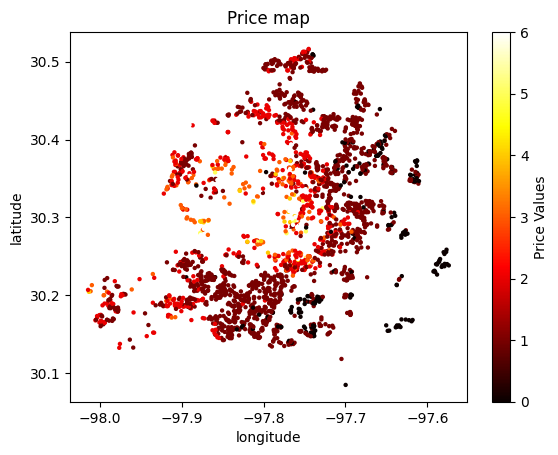

Training score: 99.32%
Validation score: 75.29%
Testing score: 73.76%


0.7376441515650741

In [ ]:
### When max_depth = 20

clf = RandomForestClassifier(max_depth=20)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 21

<ipython-input-64-f87ba184cfac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


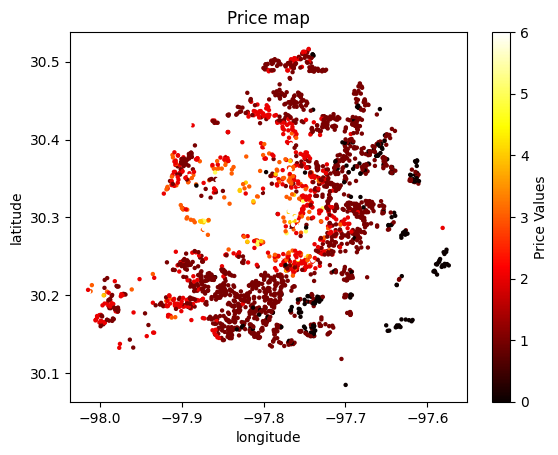

Training score: 99.64%
Validation score: 76.44%
Testing score: 74.14%


0.7413509060955519

In [ ]:
### When max_depth = 21

clf = RandomForestClassifier(max_depth=21)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 9

<ipython-input-55-8c62f1318b13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


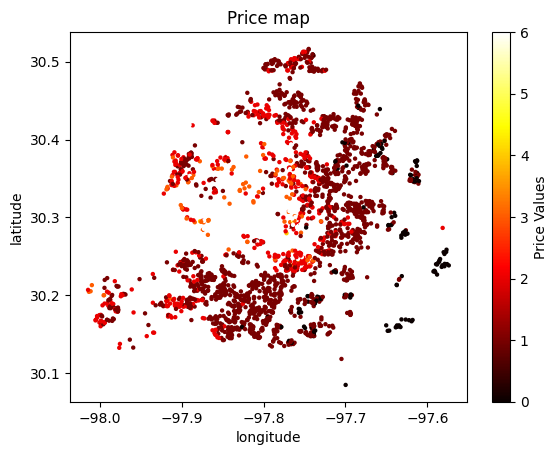

Training score: 77.52%
Validation score: 72.16%
Testing score: 71.13%


0.7112850082372323

In [ ]:
### When max_depth = 9

clf = RandomForestClassifier(max_depth=9)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 13

<ipython-input-56-1dbf008ef19f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


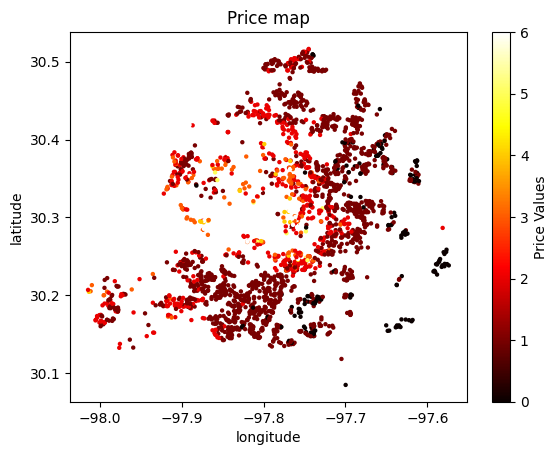

Training score: 90.94%
Validation score: 74.79%
Testing score: 73.81%


0.7380560131795717

In [ ]:
### When max_depth = 13

clf = RandomForestClassifier(max_depth=13)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 12

<ipython-input-67-82f68d5cfc6c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


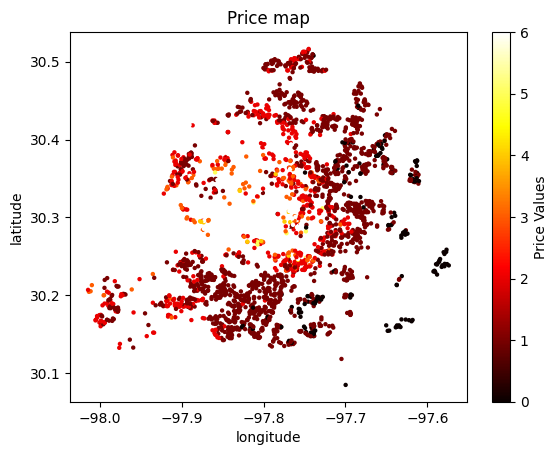

Training score: 88.23%
Validation score: 74.96%
Testing score: 73.76%


0.7376441515650741

In [ ]:
### When max_depth = 12

clf = RandomForestClassifier(max_depth=12)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

#####Max Depth = 8

<ipython-input-68-7949883f17c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= clf.predict(X_test)


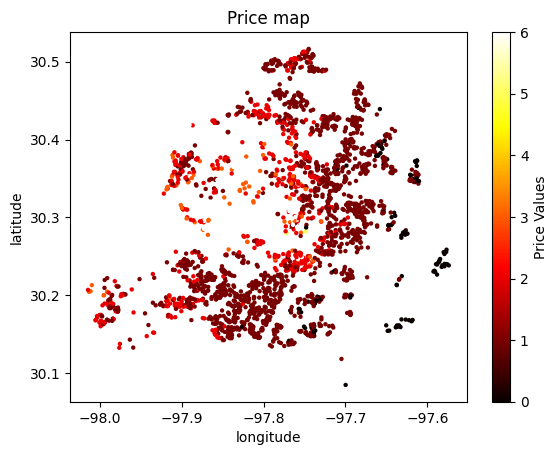

Training score: 73.87%
Validation score: 71.00%
Testing score: 70.10%


0.7009884678747941

In [ ]:
### When max_depth = 8

clf = RandomForestClassifier(max_depth=8)
clf.fit(X_train, y_train)
clf.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= clf.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

accuracy_score(y_test, clf.predict(X_test))

####Model Performance vs Max Depth Graph

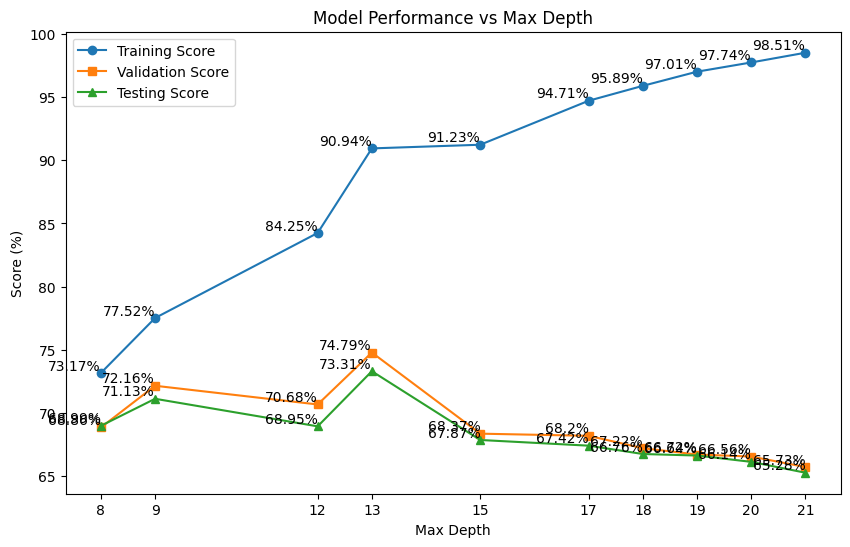

In [ ]:
import matplotlib.pyplot as plt

# Max_depth values
max_depths = [8, 9, 12, 13, 15, 17, 18, 19, 20, 21]

# Training, validation, and testing scores
training_scores = [73.17, 77.52, 84.25, 90.94, 91.23, 94.71, 95.89, 97.01, 97.74, 98.51]
validation_scores = [68.86, 72.16, 70.68, 74.79, 68.37, 68.20, 67.22, 66.72, 66.56, 65.73]
testing_scores = [68.99, 71.13, 68.95, 73.31, 67.87, 67.42, 66.76, 66.64, 66.14, 65.28]

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_scores, marker='o', label='Training Score')
plt.plot(max_depths, validation_scores, marker='s', label='Validation Score')
plt.plot(max_depths, testing_scores, marker='^', label='Testing Score')

for i in range(len(max_depths)):
    plt.text(max_depths[i], training_scores[i], f'{training_scores[i]}%', ha='right', va='bottom')
    plt.text(max_depths[i], validation_scores[i], f'{validation_scores[i]}%', ha='right', va='bottom')
    plt.text(max_depths[i], testing_scores[i], f'{testing_scores[i]}%', ha='right', va='bottom')

# Adding title and labels
plt.title('Model Performance vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score (%)')
plt.xticks(max_depths)

# Adding legend
plt.legend()

# Show plot
plt.show()

####Confusion Matrix

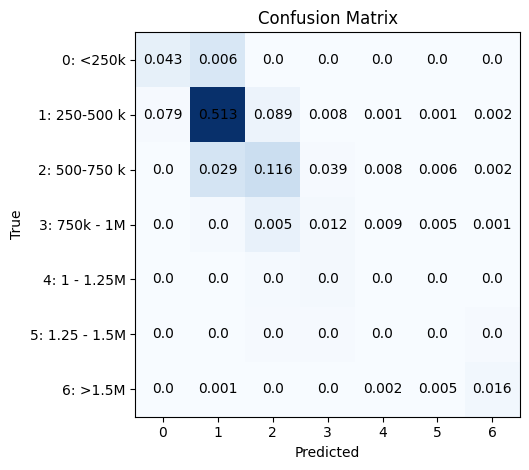

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, normalize=False):

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / len(y_true)
        cm = np.round(cm, decimals=3)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=plt.cm.Blues)

    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_yticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(['0','1', '2', '3', '4', '5','6'])
    #ax.set_yticklabels(['0','1', '2', '3', '4', '5','6'])
    #ax.set_xticklabels(['0: <250k','1: 250-500 k', '2: 500-750 k', '3: 750k - 1M','4: 1 - 1.25M', '5: 1.25 - 1.5M', '6: >1.5M'])
    ax.set_yticklabels(['0: <250k','1: 250-500 k', '2: 500-750 k', '3: 750k - 1M','4: 1 - 1.25M', '5: 1.25 - 1.5M', '6: >1.5M'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    for i in range(7):
        for j in range(7):
            text = ax.text(j, i, cm[j, i], ha="center", va="center", color="black")

    ax.set_title('Confusion Matrix')
    fig.tight_layout()
    plt.show()

# make prediction on test set
y_pred = clf.predict(X_test)
# plot confusion matrix for test set
plot_confusion_matrix(y_test, y_pred, normalize=True)

####Error Map

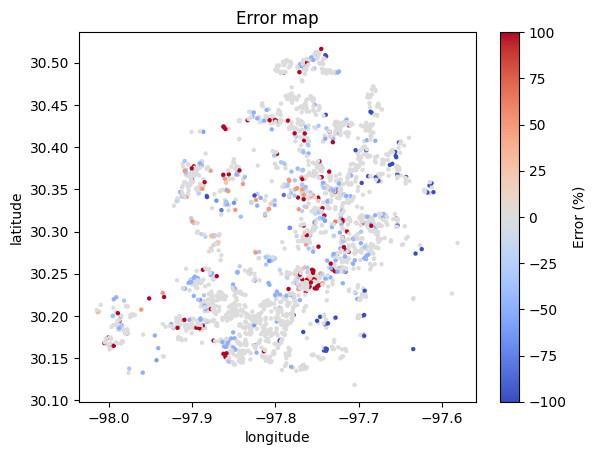

In [ ]:
dif_rf= DataFrame()
dif_rf['longitude']= X_test['longitude']
dif_rf['latitude']= X_test['latitude']
dif_rf['difference']= 100*(rf.predict(X_test) - X_test_target['Price'])/ X_test_target['Price']

# Plotting the scatter plot
plt.scatter(dif_rf['longitude'], dif_rf['latitude'], c=dif_rf['difference'], cmap='coolwarm', marker='o', s=10 , edgecolors='none', vmin=-100 , vmax=100)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Error (%)')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Error map')

# Display the plot
plt.show()

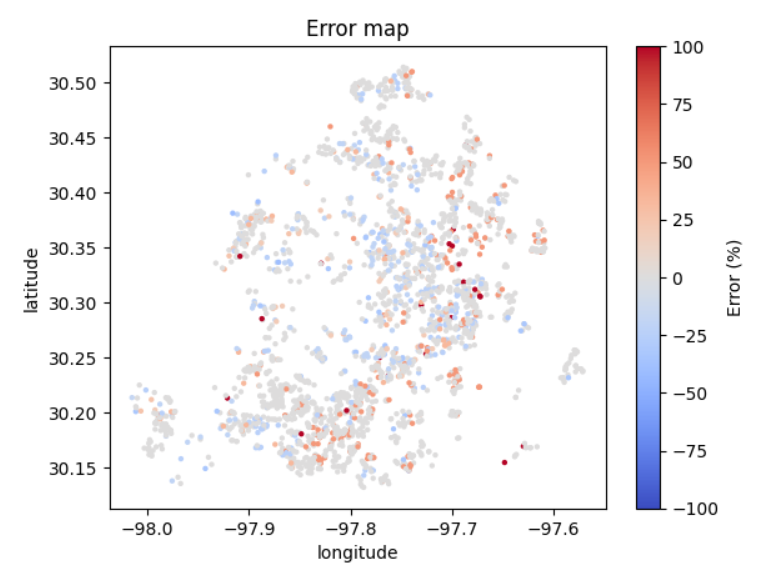

##1.3. XGBoost (Extreme Gradient Boosting)


In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

####RandomSearch

In [ ]:
# Different param2
def rfr_model(X, y):
# Perform Randomized-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = RandomizedSearchCV(
        estimator=XGBClassifier(random_state=0),
        param_distributions={
            'learning_rate': (0.01, 0.1, 0.001, 0.0001),
            'max_depth': range(10,20),
            'min_child_weight': (1, 3, 5, 7),
            'n_estimators': (10, 50, 100, 1000),
            'subsample': (0.6, 0.7, 0.8, 0.9, 1.0),
            'colsample_bytree': (0.6, 0.7, 0.8, 0.9, 1.0),
        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = XGBClassifier(learning_rate=best_params["learning_rate"],
                                 n_estimators=best_params["n_estimators"],
                                 min_child_weight=best_params["min_child_weight"],
                                  subsample = best_params["subsample"],
                                 colsample_bytree = best_params["colsample_bytree"]
                                                   )
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_XGB = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_XGB

In [ ]:
# run optimization algorithm and print CV scores
scores, oXGB = rfr_model(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Scores: {} [0.75782537 0.73640857 0.7339374  0.73887974 0.72487644 0.72652389
 0.7493817  0.74525969 0.74608409 0.73701566]


In [ ]:
#print RandomSearch results
print('Best parameters:', oXGB)
print('---')
print('CV scores:', scores)
print('CV scores (average):', np.mean(scores))
print('Training score:', oXGB.score(X_train, y_train))
print('Testing score:', oXGB.score(X_test, y_test))

Best parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
---
CV scores: [0.75782537 0.73640857 0.7339374  0.73887974 0.72487644 0.72652389
 0.7493817  0.74525969 0.74608409 0.73701566]
CV scores (average): 0.7396192538004676
Training score: 0.9615194462755439
Testing score: 0.74

####GridSearch

In [ ]:
# Different param2
def rfr_model(X, y):
# Perform Randomized-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = GridSearchCV(
        estimator=XGBClassifier(random_state=0),
        param_grid={
            'learning_rate': (0.01, 0.1, 0.001, 0.0001),
            'max_depth': range(10,20),
            'min_child_weight': (1, 3, 5, 7),
            'n_estimators': (10, 50, 100, 1000),
            'subsample': (0.6, 0.7, 0.8, 0.9, 1.0),
            'colsample_bytree': (0.6, 0.7, 0.8, 0.9, 1.0),
        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = XGBClassifier(learning_rate=best_params["learning_rate"],
                                 n_estimators=best_params["n_estimators"],
                                 min_child_weight=best_params["min_child_weight"],
                                  subsample = best_params["subsample"],
                                 colsample_bytree = best_params["colsample_bytree"]
                                                   )
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_XGB = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_XGB

In [ ]:
# run optimization algorithm and print CV scores
scores, oXGB = rfr_model(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
#print RandomSearch results
print('Best parameters:', oXGB)
print('---')
print('CV scores:', scores)
print('CV scores (average):', np.mean(scores))
print('Training score:', oXGB.score(X_train, y_train))
print('Testing score:', oXGB.score(X_test, y_test))

NameError: ignored

The executing time of this is too long, more than 12 hours, and it disconnected by itself for several times.

####Different Max Depth

##### Max Depth = 14

<ipython-input-36-f74403c926f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


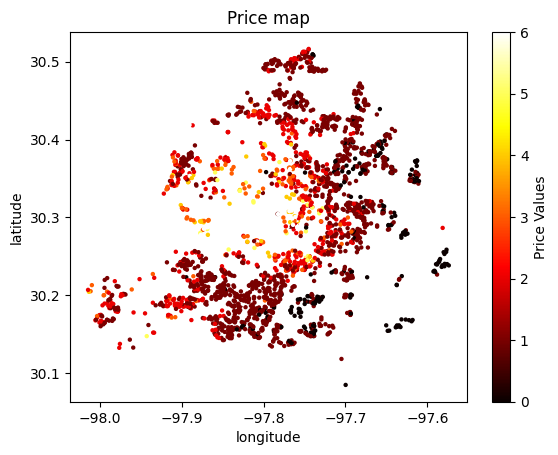

Training score: 100.00%
Validation score: 73.97%
Testing score: 74.75%


In [ ]:
# max_depth = 14
xgb = xgboost.XGBClassifier(max_depth=14)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

##### Max Depth = 8

<ipython-input-37-3937b78d2899>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


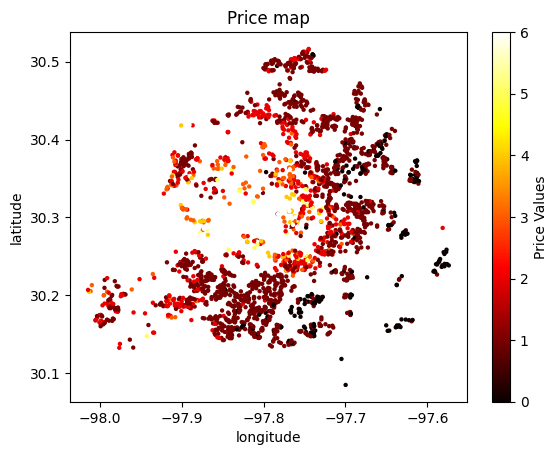

Training score: 98.94%
Validation score: 75.62%
Testing score: 74.05%


In [ ]:
# max_depth = 8
xgb = xgboost.XGBClassifier(max_depth=8)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

##### Max Depth = 12

<ipython-input-38-22898eb2af3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


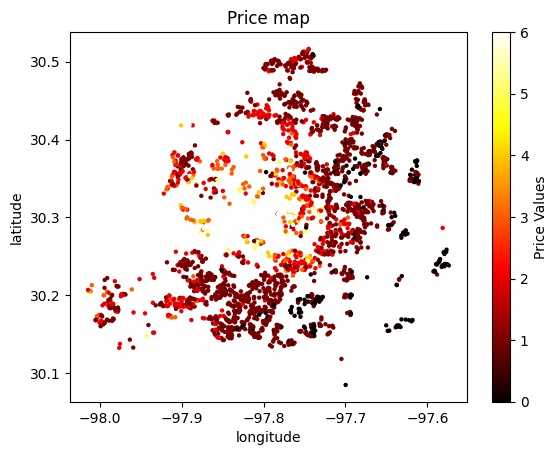

Training score: 100.00%
Validation score: 74.63%
Testing score: 74.59%


In [ ]:
# max_depth = 12
xgb = xgboost.XGBClassifier(max_depth=12)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

##### Max Depth = 15

<ipython-input-39-8b7e647cb613>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


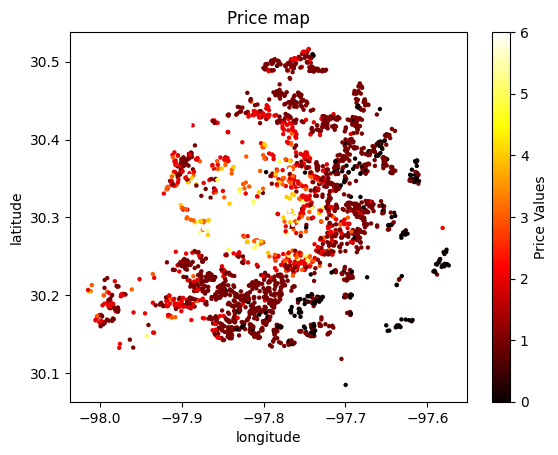

Training score: 100.00%
Validation score: 74.14%
Testing score: 74.01%


In [ ]:
# max_depth = 15
xgb = xgboost.XGBClassifier(max_depth=15)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

##### Max Depth = 17

<ipython-input-40-3f7bbde480db>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


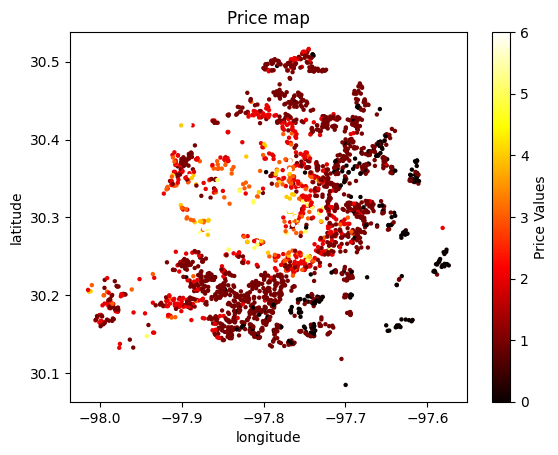

Training score: 100.00%
Validation score: 72.49%
Testing score: 73.64%


In [ ]:
# max_depth = 17
xgb = xgboost.XGBClassifier(max_depth=17)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

##### Max Depth = 21

<ipython-input-41-58b4e338935e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


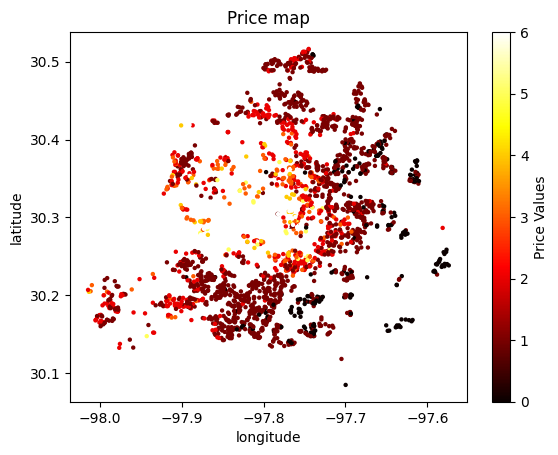

Training score: 100.00%
Validation score: 75.62%
Testing score: 73.64%


In [ ]:
# max_depth = 21
xgb = xgboost.XGBClassifier(max_depth=21)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

##### Max Depth = 23

<ipython-input-42-964bd0bd3a49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']= xgb.predict(X_test)


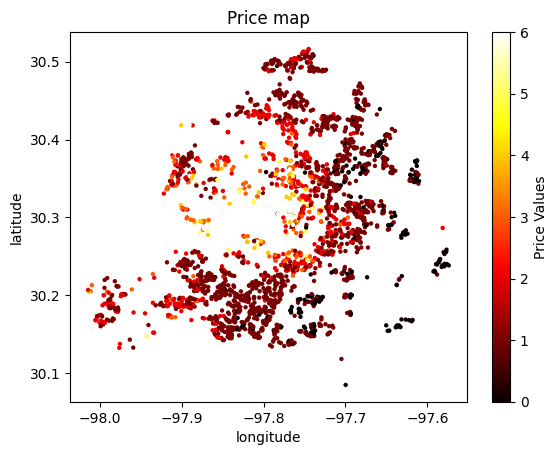

Training score: 100.00%
Validation score: 74.79%
Testing score: 74.38%


In [ ]:
# max_depth = 23
xgb = xgboost.XGBClassifier(max_depth=23)
xgb.fit(X_train, y_train)
xgb.predict(X_test)
X_test.head()
df3 = X_test[['latitude','longitude']]
df3.head()
df3['prediction']= xgb.predict(X_test)
X_test['latitude'].head()

import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot
plt.scatter(df3['longitude'], df3['latitude'], c=df3['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()
print('Training score: %.2f%%' %(xgb.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(xgb.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(xgb.score(X_test, y_test) * 100))

####Model Performance vs Max Depth Graph

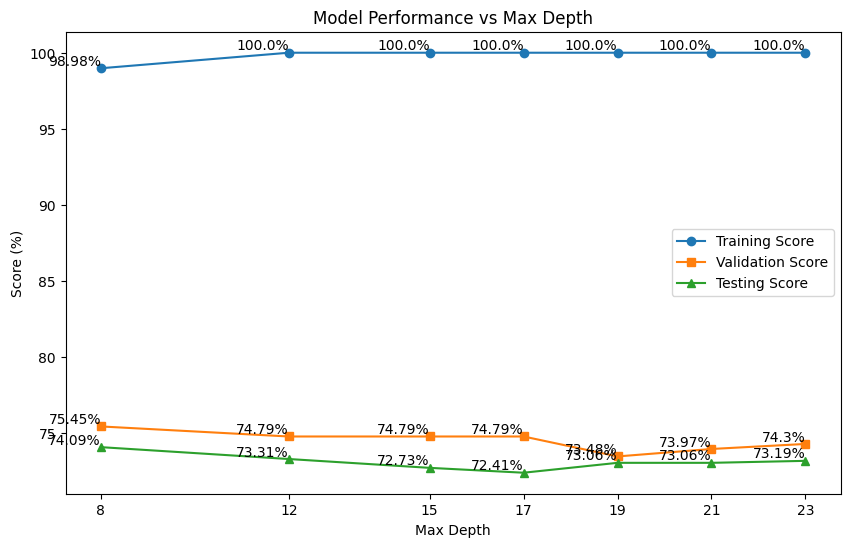

In [ ]:
import matplotlib.pyplot as plt

# Max_depth values
max_depths = [8, 12, 15, 17, 19, 21, 23]

# Training, validation, and testing scores
training_scores = [98.98, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00]
validation_scores = [75.45, 74.79, 74.79, 74.79, 73.48, 73.97, 74.30]
testing_scores = [74.09, 73.31, 72.73, 72.41, 73.06, 73.06, 73.19]

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_scores, marker='o', label='Training Score')
plt.plot(max_depths, validation_scores, marker='s', label='Validation Score')
plt.plot(max_depths, testing_scores, marker='^', label='Testing Score')

for i in range(len(max_depths)):
    plt.text(max_depths[i], training_scores[i], f'{training_scores[i]}%', ha='right', va='bottom')
    plt.text(max_depths[i], validation_scores[i], f'{validation_scores[i]}%', ha='right', va='bottom')
    plt.text(max_depths[i], testing_scores[i], f'{testing_scores[i]}%', ha='right', va='bottom')

# Adding title and labels
plt.title('Model Performance vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score (%)')
plt.xticks(max_depths)

# Adding legend
plt.legend()

# Show plot
plt.show()

####Price Map

In [ ]:
df_xb= DataFrame()
df_xb['longitude']= X_test['longitude']
df_xb['latitude']= X_test['latitude']
df_xb['prediction']= xgb.predict(X_test)

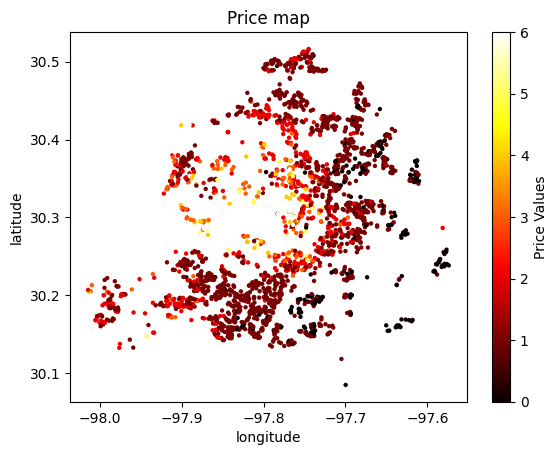

In [ ]:
# Plotting the scatter plot
plt.scatter(df_xb['longitude'], df_xb['latitude'], c=df_xb['prediction'], cmap='hot', marker='o', s=10 , edgecolors='none', vmin=0, vmax=6)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Price Values')

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Price map')

# Display the plot
plt.show()

####**1.3.2. Explainable AI**

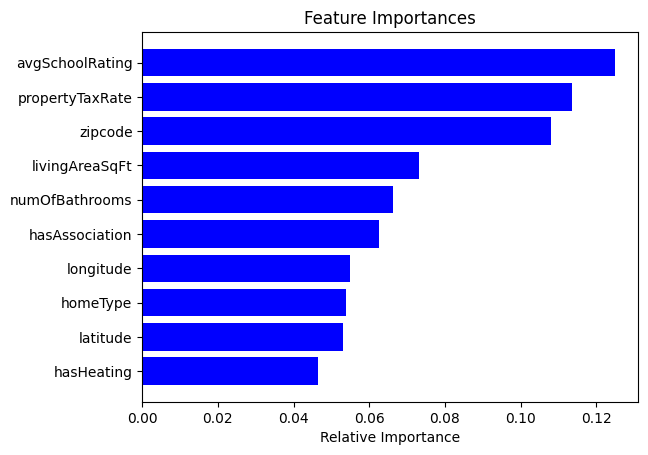

feature  importance
15    avgSchoolRating    0.124858
3     propertyTaxRate    0.113493
0             zipcode    0.107937
13     livingAreaSqFt    0.073039
16     numOfBathrooms    0.066367
5      hasAssociation    0.062590
2           longitude    0.054890
9            homeType    0.053859
1            latitude    0.052992
8          hasHeating    0.046349
12           SizeSqFt    0.035504
11          yearBuilt    0.034830
4        garageSpaces    0.029426
18       numOfStories    0.028654
14  avgSchoolDistance    0.027333
17      numOfBedrooms    0.026841
7           hasGarage    0.025183
6          hasCooling    0.023210
10      parkingSpaces    0.012645

In [ ]:
# Display results for decision tree
plot_feature_importance(X_test, xgb)

[01:50:01] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


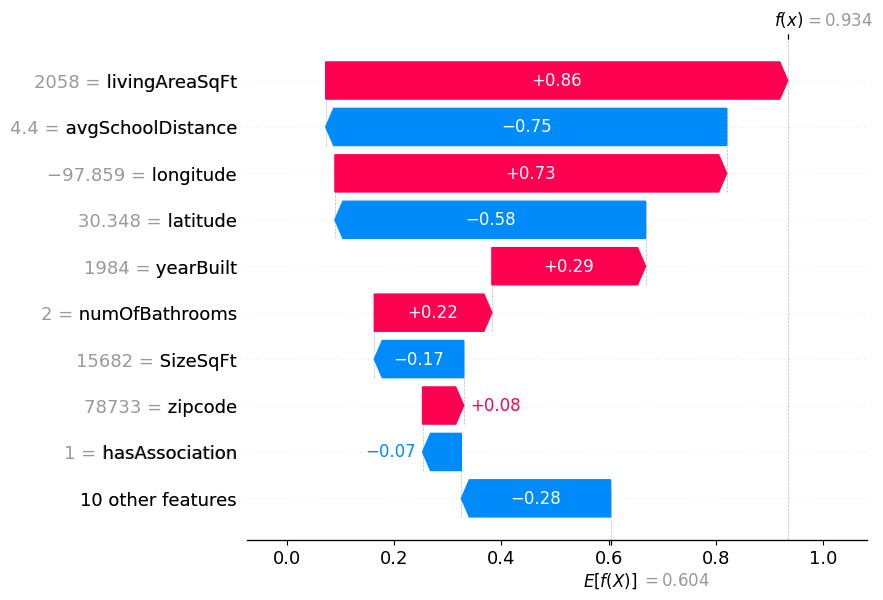

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

sv= shap_values[3]

sv.values = sv.values[:,1]

sv.base_values= sv.base_values[0]

shap.plots.waterfall(sv)

40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


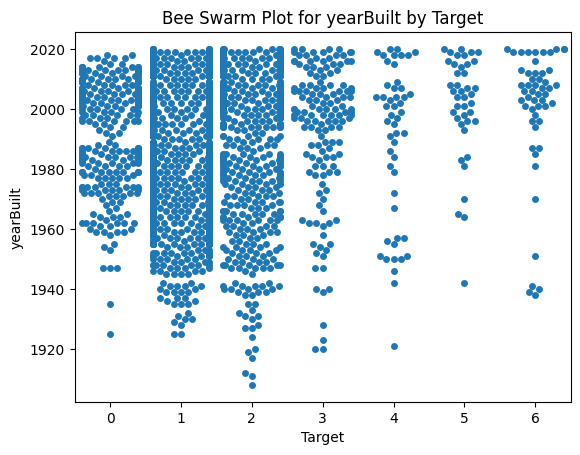

In [ ]:
year_built = 'yearBuilt'
data_to_visualize = pd.DataFrame({'yearBuilt': X_test[year_built], 'Target': y_test})

# Create a bee swarm plot
sns.swarmplot(x="Target", y='yearBuilt', data=data_to_visualize)

# Add labels and title plt.xlabel("Target")
plt.ylabel('yearBuilt')
plt.title(f"Bee Swarm Plot for {year_built} by Target")

# Show the plot
plt.show()